In [1]:
from code.neuron import *
from code.encodingsource import *
from code.hsgs import *
from code.classical_neuron import *
from code.classical_pso import *
from code.sf import *
simulator = Aer.get_backend('qasm_simulator')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from code.experiment_functions import * 

# Without Bias

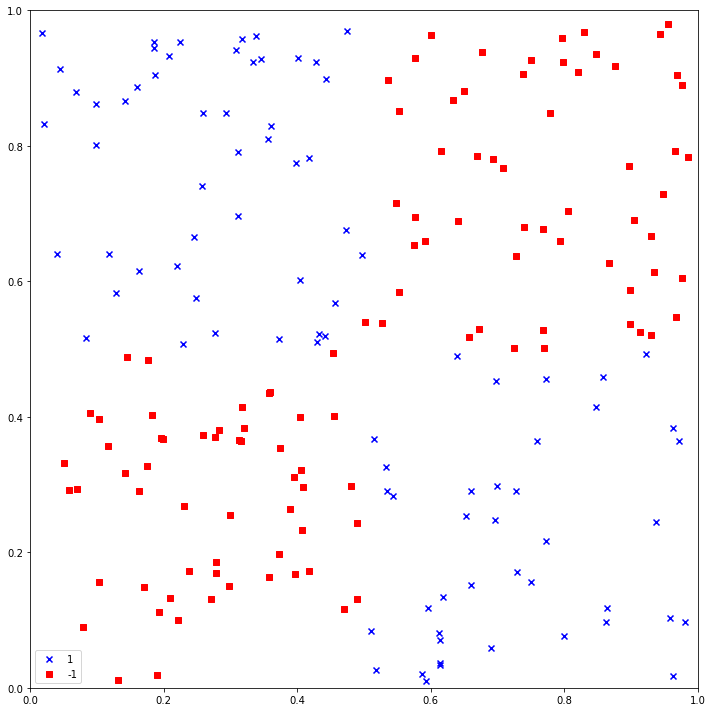

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Create Dataset
np.random.seed(0)
X_xor = np.random.rand(200, 8)
y_xor = np.logical_xor(X_xor[:, 0] > 0.5,
                       X_xor[:, 1] > 0.5)
y_xor = np.where(y_xor, 1, -1)

fig = plt.figure(figsize=(10,10))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_xor = np.round(X_xor, 4)
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.33, random_state=42)

In [4]:
X_train = [list(x) for x in X_train]
X_test = [list(x) for x in X_test]
y_train = [int(1) if x == 1 else int(0) for x in y_train]
y_test = [int(1) if x == 1 else int(0) for x in y_test]

In [6]:
"""
with open('results/version6/train_xor.json', 'w+') as fp:
    json.dump([X_train, y_train], fp)
    
with open('results/version6/test_xor.json', 'w+') as fp:
    json.dump([X_test, y_test], fp)
"""

#### load saved data

In [2]:
with open('results/version6/train_xor.json') as json_file:
    X_train = json.load(json_file)[0]

with open('results/version6/train_xor.json') as json_file:
    y_train = json.load(json_file)[1]

In [3]:
with open('results/version6/test_xor.json') as json_file:
    X_test = json.load(json_file)[0]

with open('results/version6/test_xor.json') as json_file:
    y_test = json.load(json_file)[1]

### Without Bias

In [ ]:
epoch_errosHSGS, epoch_errosEncodingWeight, epoch_errosEncodingInput, epoch_errosPhaseEncoding  = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=40, 
                                                                                                 trainingBias=False,
                                                                                                 error_by_epoch = True,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})

In [ ]:
with open('results/version6/error_by_epoch_unbiased.json', 'w+') as fp:
    json.dump({'epoch_errosHSGS': epoch_errosHSGS,
               'epoch_errosEncodingWeight': epoch_errosEncodingWeight, 
               'epoch_errosPhaseEncoding': epoch_errosPhaseEncoding, 
               'epoch_errosEncodingInput': epoch_errosEncodingInput},
              fp)

In [4]:
weightsEncodingWeight, weightsEncodingInput, weightsPhaseEncoding, weightsHSGS = experiment_TRAIN(X_train, 
                                                                                                y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=20, 
                                                                                                 trainingBias=False,
                                                                                                 error_by_epoch = False,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})


erro HSGS 1.0
erro encoding weight 0.23046875
erro encoding input 0.525390625
erro phase encoding 0.5478515625

erro HSGS 1.0
erro encoding weight 0.22265625
erro encoding input 0.5185546875
erro phase encoding 0.5390625

erro HSGS 1.0
erro encoding weight 0.22265625
erro encoding input 0.5185546875
erro phase encoding 0.5390625

erro HSGS 1.0
erro encoding weight 0.21875
erro encoding input 0.5185546875
erro phase encoding 0.5380859375

erro HSGS 1.0
erro encoding weight 0.21875
erro encoding input 0.5185546875
erro phase encoding 0.5380859375

erro HSGS 1.0
erro encoding weight 0.21875
erro encoding input 0.5185546875
erro phase encoding 0.5380859375

erro HSGS 1.0
erro encoding weight 0.21875
erro encoding input 0.5185546875
erro phase encoding 0.5380859375

erro HSGS 1.0
erro encoding weight 0.21875
erro encoding input 0.5185546875
erro phase encoding 0.529296875

erro HSGS 1.0
erro encoding weight 0.21484375
erro encoding input 0.5185546875
erro phase encoding 0.529296875

erro H

In [5]:
weights = [weightsEncodingWeight, 
          weightsEncodingInput, 
          weightsPhaseEncoding, 
          weightsHSGS]

In [6]:
with open('results/version6/weights_unbiased_v6.json', 'w+') as fp:
    json.dump(weights, fp)

#### Test

In [7]:
with open('results/version6/weights_unbiased_v6.json') as json_file:
    weights = json.load(json_file)

In [8]:
resultsBIAS = experiment_TEST(X_test, 
                              y_test, 
                              weights[0], 
                              weights[1], 
                              weights[2], 
                              weights[3], 
                              repeat=10,
                              bias=False, 
                              testingApproaches={'neuronio-classico', 'neuronio-classico-bin', 'hsgs','encoding-weight', 'phase-encoding','encoding-input'})

erro HSGS 0.5
erro encoding weight 0.5151515151515151
erro encoding input 0.42424242424242425
erro phase encoding 0.4696969696969697
erro HSGS 0.5
erro encoding weight 0.5909090909090909
erro encoding input 0.36363636363636365
erro phase encoding 0.48484848484848486
erro HSGS 0.5
erro encoding weight 0.5454545454545454
erro encoding input 0.3333333333333333
erro phase encoding 0.5
erro HSGS 0.5
erro encoding weight 0.5151515151515151
erro encoding input 0.5
erro phase encoding 0.5
erro HSGS 0.5
erro encoding weight 0.5303030303030303
erro encoding input 0.5151515151515151
erro phase encoding 0.4696969696969697
erro HSGS 0.5
erro encoding weight 0.5606060606060606
erro encoding input 0.4696969696969697
erro phase encoding 0.5454545454545454
erro HSGS 0.5
erro encoding weight 0.5909090909090909
erro encoding input 0.48484848484848486
erro phase encoding 0.5454545454545454
erro HSGS 0.5
erro encoding weight 0.6212121212121212
erro encoding input 0.4696969696969697
erro phase encoding 0.43

In [9]:
with open('results/version6/experiments_unbiased.json', 'w+') as fp:
    json.dump(resultsBIAS, fp)

## BIAS

In [ ]:
epoch_errosHSGS, epoch_errosEncodingWeight, epoch_errosEncodingInput, epoch_errosPhaseEncoding  = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=40, 
                                                                                                 trainingBias=True,
                                                                                                 error_by_epoch = True,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})
                                    

In [ ]:
with open('results/version6/error_by_epoch_biased.json', 'w+') as fp:
    json.dump({'epoch_errosHSGS': epoch_errosHSGS,
               'epoch_errosEncodingWeight': epoch_errosEncodingWeight, 
               'epoch_errosPhaseEncoding': epoch_errosPhaseEncoding, 
               'epoch_errosEncodingInput': epoch_errosEncodingInput},
              fp)

In [10]:
weightsEncodingWeight, weightsEncodingInput, weightsPhaseEncoding, weightsHSGS = experiment_TRAIN(X_train, 
                                                                                                 y_train,
                                                                                                 lrParameter=0.2, 
                                                                                                 n_epochs=20, 
                                                                                                 trainingBias=True,
                                                                                                 error_by_epoch = False,
                                                                                                 trainingApproaches={'neuronio-classico', 
                                                                                                                     'neuronio-classico-bin', 
                                                                                                                     'hsgs',
                                                                                                                     'encoding-weight', 
                                                                                                                     'encoding-input',
                                                                                                                     'phase-encoding'})


erro HSGS 1.0
erro encoding weight 0.2392578125
erro encoding input 0.74609375
erro phase encoding 0.43359375

erro HSGS 1.0
erro encoding weight 0.2294921875
erro encoding input 0.71484375
erro phase encoding 0.3828125

erro HSGS 1.0
erro encoding weight 0.2099609375
erro encoding input 0.71484375
erro phase encoding 0.3828125

erro HSGS 1.0
erro encoding weight 0.2099609375
erro encoding input 0.71484375
erro phase encoding 0.3828125

erro HSGS 1.0
erro encoding weight 0.2099609375
erro encoding input 0.71484375
erro phase encoding 0.3828125

erro HSGS 1.0
erro encoding weight 0.20703125
erro encoding input 0.71484375
erro phase encoding 0.3828125

erro HSGS 1.0
erro encoding weight 0.20703125
erro encoding input 0.71484375
erro phase encoding 0.353515625

erro HSGS 1.0
erro encoding weight 0.20703125
erro encoding input 0.71484375
erro phase encoding 0.353515625

erro HSGS 1.0
erro encoding weight 0.2001953125
erro encoding input 0.708984375
erro phase encoding 0.353515625

erro HS

In [11]:
weights = [weightsEncodingWeight, 
          weightsEncodingInput, 
          weightsPhaseEncoding, 
          weightsHSGS]

In [12]:
with open('results/version6/weights_biased_v6.json', 'w+') as fp:
    json.dump(weights, fp)

In [13]:
resultsBIAS = experiment_TEST(X_test, 
                              y_test, 
                              weights[0], 
                              weights[1], 
                              weights[2], 
                              weights[3], 
                              repeat=10,
                              bias=True, 
                              testingApproaches={'neuronio-classico', 'neuronio-classico-bin', 'hsgs','encoding-weight', 'phase-encoding','encoding-input'})

erro HSGS 0.5
erro encoding weight 0.6363636363636364
erro encoding input 0.5757575757575758
erro phase encoding 0.45454545454545453
erro HSGS 0.5
erro encoding weight 0.48484848484848486
erro encoding input 0.48484848484848486
erro phase encoding 0.5303030303030303
erro HSGS 0.5
erro encoding weight 0.5151515151515151
erro encoding input 0.3787878787878788
erro phase encoding 0.5606060606060606
erro HSGS 0.5
erro encoding weight 0.5606060606060606
erro encoding input 0.5
erro phase encoding 0.5
erro HSGS 0.5
erro encoding weight 0.5757575757575758
erro encoding input 0.48484848484848486
erro phase encoding 0.4696969696969697
erro HSGS 0.5
erro encoding weight 0.6060606060606061
erro encoding input 0.48484848484848486
erro phase encoding 0.5303030303030303
erro HSGS 0.5
erro encoding weight 0.6212121212121212
erro encoding input 0.45454545454545453
erro phase encoding 0.5151515151515151
erro HSGS 0.5
erro encoding weight 0.5151515151515151
erro encoding input 0.42424242424242425
erro p

In [14]:
with open('results/version6/experiments_biased.json', 'w+') as fp:
    json.dump(resultsBIAS, fp)

#### xgboost baseline

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [9]:
model = XGBClassifier()
model.fit(np.array(X_train), np.array(y_train))

[15:02:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# make predictions for test data
y_pred = model.predict(np.array(X_test))
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(np.array(y_test), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.45%
